In [2]:
import seaborn as sns
import pandas as pd

## Step 1: Load the Titanic Dataset

In [3]:
# Load Titanic dataset
titanic = sns.load_dataset("titanic")
print(titanic.head()) # Displays first 5 rows

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


## Step 2: Basic Data Information

In [4]:
# Check the shape of the dataset
print(f"Dataset Shape: {titanic.shape}")

# check for missing values
print("\n Missing values: ", titanic.isnull().sum())

# summary statistics
print("\n Summary Statistics: ", titanic.describe())

Dataset Shape: (891, 15)

 Missing values:  survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

 Summary Statistics:           survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.

## Step 3: Analyze Survival Rates by Different Factors

In [6]:
# survival rate by gender.
survival_gender = titanic.groupby("sex")["survived"].mean() * 100
print("\n Survival Rate by Gender: ", survival_gender)


 Survival Rate by Gender:  sex
female    74.203822
male      18.890815
Name: survived, dtype: float64


In [7]:
# Survival rate by class
survival_class = titanic.groupby("pclass")["survived"].mean() * 100
print("\n Survival rate By passenger class: ", survival_class)


 Survival rate By passenger class:  pclass
1    62.962963
2    47.282609
3    24.236253
Name: survived, dtype: float64


## Step 4: Visualizations

- **Survival Rate by Gender**

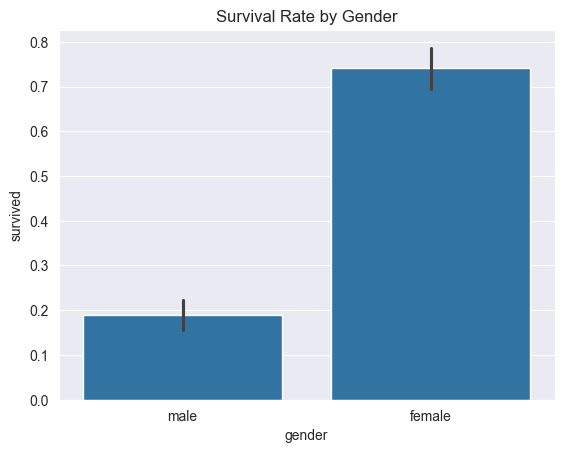

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=titanic, x="sex", y="survived")
plt.title("Survival Rate by Gender")
plt.xlabel("gender")
plt.ylabel("survived")
plt.show()

- **Survival Rate by Passenger Class**

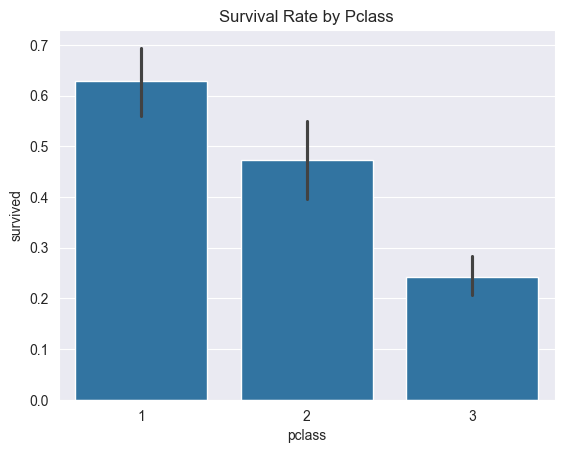

In [11]:
sns.barplot(data=titanic, x="pclass", y="survived")
plt.title("Survival Rate by Pclass")
plt.xlabel("pclass")
plt.ylabel("survived")
plt.show()

- **Age Distribution of Titanic Passengers**

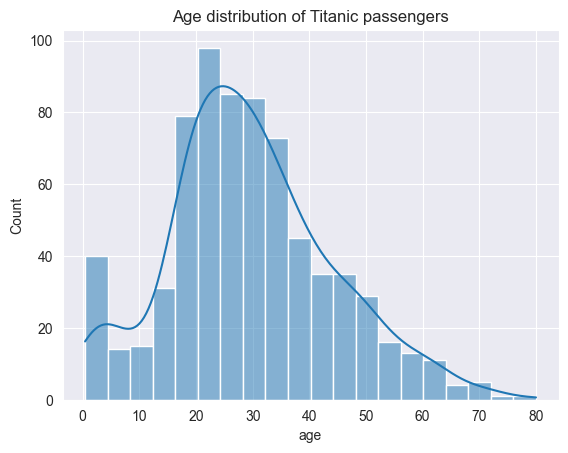

In [13]:
sns.histplot(data=titanic, x="age", bins=20, kde=True)
plt.title("Age distribution of Titanic passengers")
plt.show()

## Step 5: More In-Depth Analysis

- **Survival Rate by Age Group:**

In [15]:
# create age groups
bins = [0, 12, 18, 35, 50, 80]
labels = ["Child", "Teenager", "Young Adult", " Middle-Aged", "senior"]
titanic["age_group"] = pd.cut(titanic["age"], bins=bins, labels=labels)

# Survival Rate by Age Group
survival_age_group = titanic.groupby("survived")["age"].mean() * 100
print("\nSurvival Rate by Age: ", survival_age_group)


Survival Rate by Age:  survived
0    3062.617925
1    2834.368966
Name: age, dtype: float64


- **Survival by Embarkation Port:**

In [16]:
survival_embarked = titanic.groupby("embarked")["survived"].mean() * 100
print("\nSurvival Rate by Embarkation port: ", survival_embarked)


Survival Rate by Embarkation port:  embarked
C    55.357143
Q    38.961039
S    33.695652
Name: survived, dtype: float64


- **Visualization - Survival Rate by Age Group:**

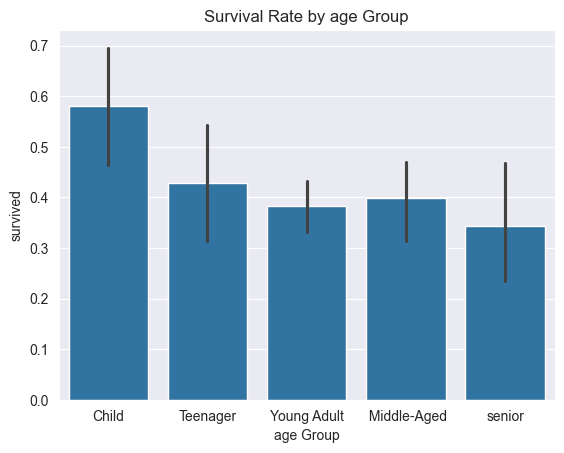

In [17]:
sns.barplot(data=titanic, x="age_group", y="survived")
plt.title("Survival Rate by age Group")
plt.xlabel("age Group")
plt.ylabel("survived")
plt.show()

- **Visualization - Survival Rate by Embarkation Port:**

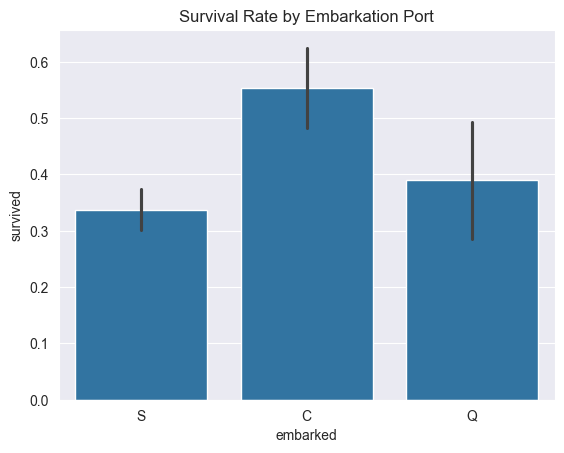

In [18]:
sns.barplot(data=titanic, x="embarked", y="survived")
plt.title("Survival Rate by Embarkation Port")
plt.xlabel("embarked")
plt.ylabel("survived")
plt.show()

## Step 6: Survival Rate by Multiple Factors (Combined Analysis)

- **Survival Rate by Gender and Class:**

In [19]:
survival_gender_class = titanic.groupby(["sex", "pclass"])["survived"].mean() * 100
print("\nSurvival Rate by Gender: ", survival_gender_class)


Survival Rate by Gender:  sex     pclass
female  1         96.808511
        2         92.105263
        3         50.000000
male    1         36.885246
        2         15.740741
        3         13.544669
Name: survived, dtype: float64


*Visualization:
Create a bar plot to show the survival rate for each gender-class combination:*

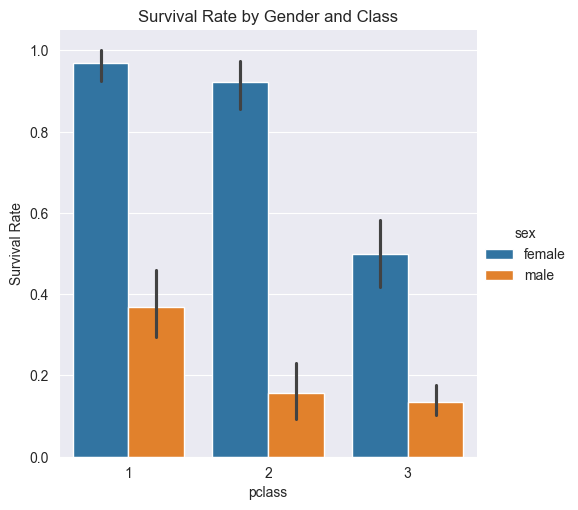

In [20]:
sns.catplot(data=titanic, x="pclass", y="survived", hue="sex", kind="bar")
plt.title("Survival Rate by Gender and Class")
plt.ylabel("Survival Rate")
plt.show()

- **Survival Rate by Family Size:**

In [23]:
#create a column of family size(siblings/spouses + parents/children + 1 (self))
titanic["Family_size"] = titanic["sibsp"] + titanic["parch"] + 1

# Survival Rate by Family Size
survival_family_size = titanic.groupby("Family_size")["survived"].mean() * 100
print("\n Survival Rate by Family Size: ", survival_family_size)


 Survival Rate by Family Size:  Family_size
1     30.353818
2     55.279503
3     57.843137
4     72.413793
5     20.000000
6     13.636364
7     33.333333
8      0.000000
11     0.000000
Name: survived, dtype: float64


*Visualization:Create a line plot to see trends in survival rates across different family sizes:*

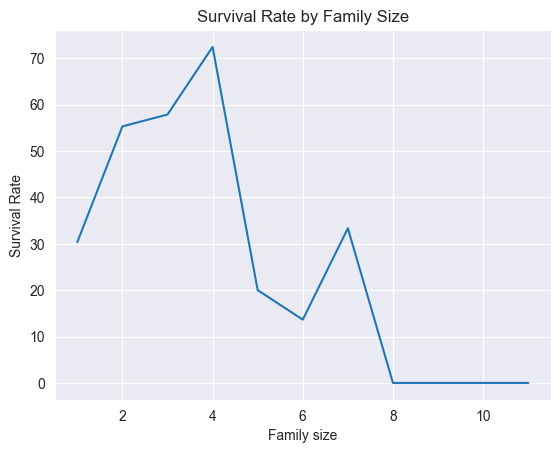

In [26]:
sns.lineplot(data=survival_family_size)
plt.title("Survival Rate by Family Size")
plt.xlabel("Family size")
plt.ylabel("Survival Rate")
plt.show()

## Step 7: Correlation Matrix and Heatmap

- **Correlation Matrix:**

In [27]:
# Calculate the Correlation Matrix
correlation_matrix = titanic.corr()

# Print Correlation Matrix
print("\nCorrelation Matrix: ", correlation_matrix)

ValueError: could not convert string to float: 'male'

This error is happening because the correlation function (titanic.corr()) only works on numerical data, but your dataset contains categorical columns like sex, embarked, and class. To solve this, we need to convert categorical columns into numerical ones.

In [40]:
# Convert 'sex' to numerical
titanic["sex"] = titanic["sex"].map({"male": 0, "female": 1})

# Convert 'who' to numerical
titanic["who"] = titanic["who"].map({"man": 0, "woman": 1, "child": 2})

# Convert 'class' to numerical
titanic["class"] = titanic["class"].map({"First": 1, "Second": 2, "Third": 3})

# Convert 'embarked' to numerical
titanic["embarked"] = titanic["embarked"].map({"C": 0, "Q": 1, "S": 2})

# Drop columns with non-numeric data or irrelevant information
titanic.drop(columns=["deck", "embark_town", "alive", "adult_male"], inplace=True, errors="ignore")

# Check for any remaining non-numeric columns
print("\nData Types:\n", titanic.dtypes)


Data Types:
 survived          int64
pclass            int64
sex             float64
age             float64
sibsp             int64
parch             int64
fare            float64
embarked        float64
class           float64
who             float64
alone              bool
age_group      category
Family_size       int64
dtype: object


In [41]:
# Convert 'alone' (boolean) to numeric
titanic["alone"] = titanic["alone"].astype(int)

# Drop 'age_group' since it's categorical
titanic.drop(columns=["age_group"], inplace=True, errors="ignore")

In [42]:
#Now you can safely calculate the correlation matrix without errors:
# Calculate the Correlation Matrix
correlation_matrix = titanic.corr()

# Print Correlation Matrix
print("\nCorrelation Matrix: ", correlation_matrix)


Correlation Matrix:               survived    pclass  sex       age     sibsp     parch      fare  \
survived     1.000000 -0.338481  NaN -0.077221 -0.035322  0.081629  0.257307   
pclass      -0.338481  1.000000  NaN -0.369226  0.083081  0.018443 -0.549500   
sex               NaN       NaN  NaN       NaN       NaN       NaN       NaN   
age         -0.077221 -0.369226  NaN  1.000000 -0.308247 -0.189119  0.096067   
sibsp       -0.035322  0.083081  NaN -0.308247  1.000000  0.414838  0.159651   
parch        0.081629  0.018443  NaN -0.189119  0.414838  1.000000  0.216225   
fare         0.257307 -0.549500  NaN  0.096067  0.159651  0.216225  1.000000   
embarked          NaN       NaN  NaN       NaN       NaN       NaN       NaN   
class             NaN       NaN  NaN       NaN       NaN       NaN       NaN   
who               NaN       NaN  NaN       NaN       NaN       NaN       NaN   
alone       -0.203367  0.135207  NaN  0.198270 -0.584471 -0.583398 -0.271832   
Family_size  0.016

*Heatmap Visualization:
A heatmap can help visualize the correlations more clearly:*

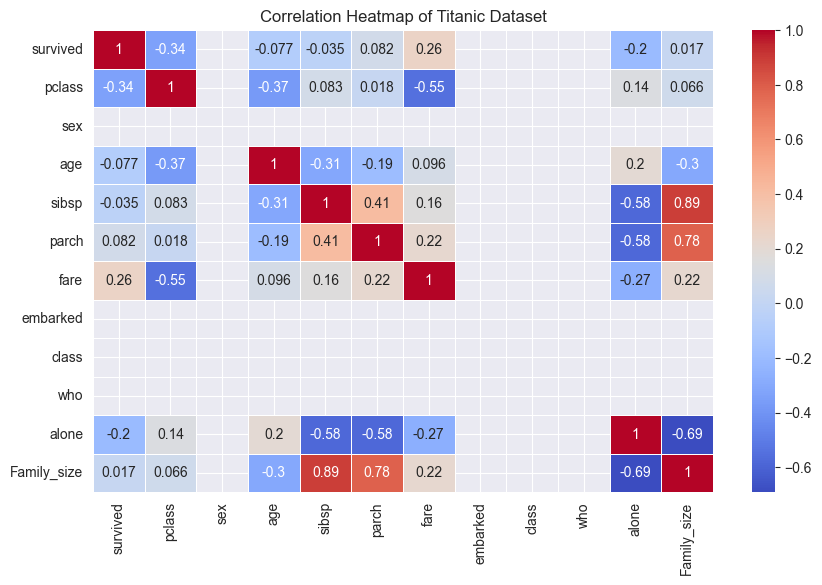

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# plot heatmap
plt.figure(figsize=[10,6])
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap of Titanic Dataset")
plt.show()